Question 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/dataset.csv')
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84


In [ ]:
# 1(i)
X = df.drop(columns = ['Y1'].copy())
Y = df['Y1']

X_train, X_res, Y_train, Y_res = train_test_split(X, Y, train_size = 0.7)

X_val, X_test, Y_val, Y_test = train_test_split(X_res, Y_res, train_size = 0.333)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(537, 8) (537,)
(76, 8) (76,)
(155, 8) (155,)


In [ ]:
# 1(ii)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

DTG1 = DecisionTreeRegressor(random_state=1)
DTG1.fit(X_train, Y_train)

Y_pred = DTG1.predict(X_val)
mse1 = mean_squared_error(Y_pred, Y_val)
print(mse1)

0.3620592105263157


In [ ]:
DTG2 = DecisionTreeRegressor(criterion='squared_error', max_depth = 7, min_samples_split=4)
DTG2.fit(X_train, Y_train)

Y_pred2 = DTG2.predict(X_val)
mse2 = mean_squared_error(Y_pred2, Y_val)
print(mse2)

0.2830112724214289


In [ ]:
DTG3 = DecisionTreeRegressor(criterion='absolute_error', min_samples_split = 4, max_depth = 7)
DTG3.fit(X_train, Y_train)

Y_pred3 = DTG3.predict(X_val)
mse3 = mean_squared_error(Y_pred3, Y_val)
print(mse3)



0.38552368421052685


In [ ]:
DTG4 = DecisionTreeRegressor(criterion='squared_error', max_depth = 8, min_samples_split=4)
DTG4.fit(X_train, Y_train)

Y_pred4 = DTG4.predict(X_val)
mse4 = mean_squared_error(Y_pred4, Y_val)
print(mse4)

#Here DTG2 gives the best result , i.e. when the criterion is 'squared_error', , then we obtain best result and minimum MSE

0.30285302353875765


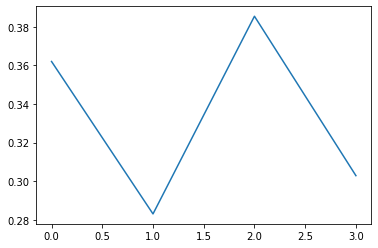

In [ ]:
import matplotlib.pyplot as plt
plt.plot([mse1, mse2, mse3, mse4])


In [ ]:
# 1(iii)

# Using Hold-out Validation and finding the mse for the test data
Y_pred_hold = DTG3.predict(X_test)
mse_hold = mean_squared_error(Y_pred_hold, Y_test)
print(mse_hold)

0.4579895161290324


In [ ]:
# Using 5-Fold Validation and finding the mse for the test data

from sklearn.model_selection import KFold
kf1 = KFold(n_splits=5, shuffle = False)
kf2 = KFold(n_splits=5, shuffle = True)



In [ ]:

#without shuffling
mse_list_fold1 = []
mse_list_fold2 = []

for train_index, test_index in kf1.split(X):
  X_train_fold = X.iloc[train_index]
  X_test_fold = X.iloc[test_index]
  Y_train_fold = Y.iloc[train_index]
  Y_test_fold = Y.iloc[test_index]

  DTG3.fit(X_train_fold, Y_train_fold)
  Y_pred_fold = DTG3.predict(X_test_fold)
  
  mse_list_fold1.append(mean_squared_error(Y_pred_fold, Y_test_fold))

average_mse1 = sum(mse_list_fold1)/len(mse_list_fold1)
print ("5-Fold Cross-Validation without Shuffling = ", average_mse1)


#with shuffling
for train_index, test_index in kf2.split(X):
  X_train_fold = X.iloc[train_index]
  X_test_fold = X.iloc[test_index]
  Y_train_fold = Y.iloc[train_index]
  Y_test_fold = Y.iloc[test_index]

  DTG3.fit(X_train_fold, Y_train_fold)
  Y_pred_fold = DTG3.predict(X_test_fold)
  
  mse_list_fold2.append(mean_squared_error(Y_pred_fold, Y_test_fold))

average_mse2 = sum(mse_list_fold2)/len(mse_list_fold2)
print ("5-Fold Cross-Validation with Shuffling =", average_mse2)


5-Fold Cross-Validation without Shuffling =  2.93327659578983
5-Fold Cross-Validation with Shuffling = 0.3781359653255241


In [ ]:
#using Repeated 5-fold cross validation

mse_rfold = []

from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_repeats = 5, n_splits =5)


for train_index, test_index in rkf.split(X):
  X_train_fold = X.iloc[train_index]
  X_test_fold = X.iloc[test_index]
  Y_train_fold = Y.iloc[train_index]
  Y_test_fold = Y.iloc[test_index]

  DTG3.fit(X_train_fold, Y_train_fold)
  Y_pred_fold = DTG3.predict(X_test_fold)
  mse_rfold.append(mean_squared_error(Y_pred_fold, Y_test_fold))

average_rmse = sum(mse_rfold)/len(mse_rfold)

print ("MSE of Repeated KFold Cross Validation = ", average_rmse)



# Amongs all tries Cross-Validations, 5-Fold Cross-Validation with Shuffling worked the best.


MSE of Repeated KFold Cross Validation =  0.37849752699261535


In [ ]:
from sklearn.tree import  plot_tree

plot_tree(DTG3)

Question 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# 2(i)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



In [ ]:
! pip install -U scikit-learn --user 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 50.3 MB/s eta 0:00:00


In [ ]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split as tts

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 2:4]         #taking petal-length and petal-width
Y = iris.target

print(X.shape)
print(Y.shape)



(150, 2)
(150,)


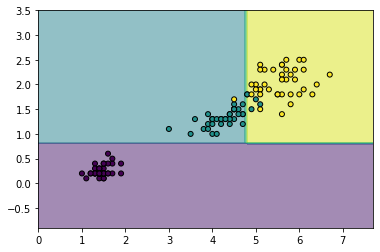

In [ ]:
DTG = DecisionTreeClassifier(max_depth = 2)
X_train, X_test, Y_train, Y_test = tts(X, Y, train_size = 0.8)

DTG.fit(X_train, Y_train)

DecisionBoundaryDisplay.from_estimator(DTG, X_train, alpha = 0.5, response_method="predict")
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=25, edgecolor="k")



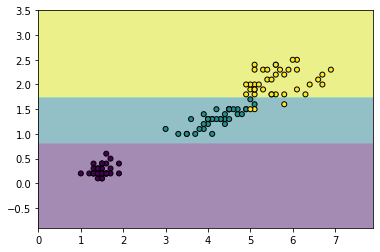

In [ ]:
# 2(ii)


data_temp = np.column_stack((X, Y))



data_temp_del = np.delete(data_temp,  np.where((data_temp[:, 0] == 4.8) & (data_temp[:, 1] == 1.8))[0], axis = 0)



X_new = data_temp_del[:, 0:2]
Y_new = data_temp_del[:, 2]



X_train_new, X_test_new, Y_train_new, Y_test_new = tts(X_new, Y_new, train_size = 0.8)
DTG2 = DecisionTreeClassifier(max_depth = 2)
DTG2.fit(X_train_new, Y_train_new)


DecisionBoundaryDisplay.from_estimator(DTG2, X_train_new, alpha = 0.5, response_method="predict")
plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=Y_train_new, s=25, edgecolor="k")








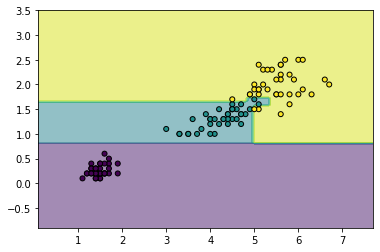

In [ ]:
#  2(iii)
DTG3 = DecisionTreeClassifier(max_depth = None)
DTG3.fit(X_train_new, Y_train_new)

DecisionBoundaryDisplay.from_estimator(DTG3, X_train_new, alpha = 0.5, response_method="predict")
plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=Y_train_new, s=25, edgecolor="k")


In [ ]:
import random


X1 = [[random.uniform(0, 2.5), random.uniform(0, 5)] for j in range(100)]
X2 = [[random.uniform(2.5, 5), random.uniform(0, 5)] for j in range(100)]

X = np.concatenate((X1, X2), axis = 0)
np.random.shuffle(X)
print(X.shape)

Y = X[:, 0].copy()
Y[Y<2.5] = 0
Y[Y>2.5] = 1

print(Y.shape)


(200, 2)
(200,)


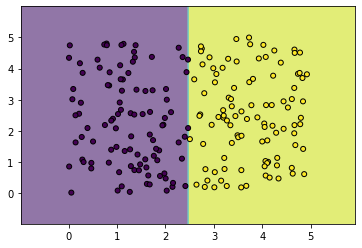

In [ ]:
DTG = DecisionTreeClassifier(max_depth = 2)
DTG.fit(X, Y)

DecisionBoundaryDisplay.from_estimator(DTG, X, alpha = 0.6, response_method="predict")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=25, edgecolor="k")

In [ ]:
X_rot1 = np.add(X[:, 0], X[:, 1])/np.sqrt(2)
X_rot2 = np.subtract(X[:, 1], X[:, 0])/np.sqrt(2)


X_rot1 = X_rot1.reshape(-1, 1)
X_rot2 = X_rot2.reshape(-1, 1)

X_rot = np.concatenate((X_rot1, X_rot2), axis = 1)



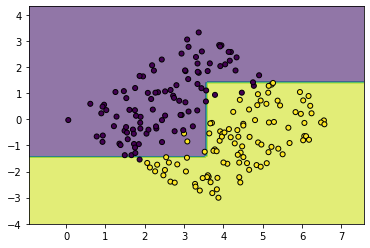

In [ ]:
DTG_rot = DecisionTreeClassifier(max_depth = 2)
DTG_rot.fit(X_rot, Y)

DecisionBoundaryDisplay.from_estimator(DTG_rot, X_rot, alpha = 0.6, response_method="predict")
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=Y, s=25, edgecolor="k")

Regression


In [77]:
import pandas as pd
import numpy as np

In [79]:
data = pd.read_csv('/content/task.csv')
X = np.array(data['X'])
Y = np.array(data['Y'])

In [80]:
X = X.reshape(-1, 1)

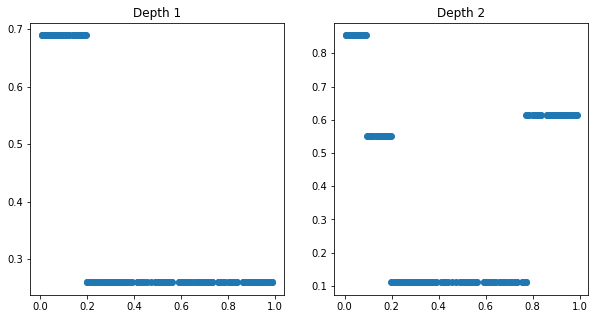

In [98]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(1, 2)


plt.gcf().set_size_inches(10, 5)
for i in range(1, 3):
    DTR = DecisionTreeRegressor(max_depth = i)
    DTR.fit(X, Y)
    axs[i-1].scatter(X, DTR.predict(X))
    axs[i-1].set_title('Depth {}'.format(i))

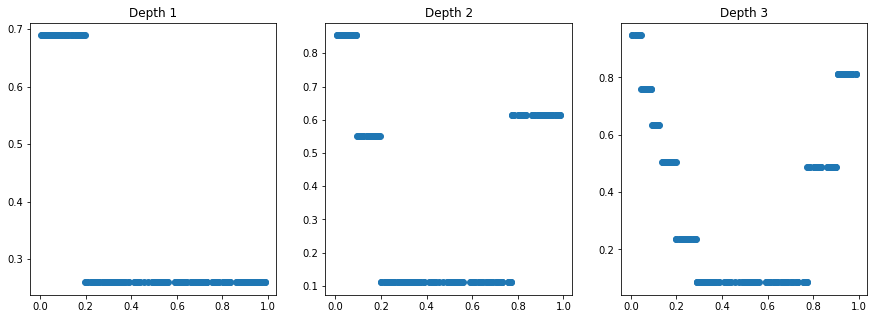

In [101]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(1, 3)


plt.gcf().set_size_inches(15, 5)
for i in range(1, 4):
    DTR = DecisionTreeRegressor(max_depth = i)
    DTR.fit(X, Y)
    axs[i-1].scatter(X, DTR.predict(X))
    axs[i-1].set_title('Depth {}'.format(i))


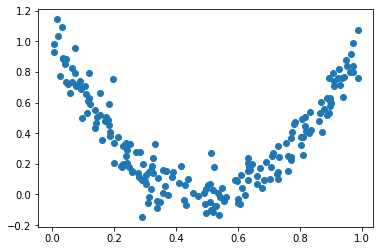

In [113]:
DTG1 = DecisionTreeRegressor(min_samples_leaf=1)
DTG1.fit(X, Y)

plt.scatter(X,DTG1.predict(X))


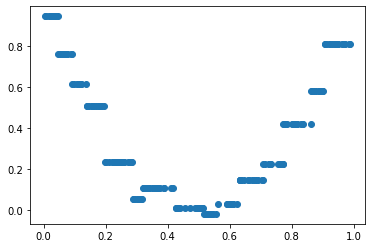

In [114]:
DTG2 = DecisionTreeRegressor(min_samples_leaf=10)
DTG2.fit(X, Y)

plt.scatter(X,DTG2.predict(X))


Question 3

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = pd.read_csv('https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/master/palmerpenguins/data/penguins.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [62]:
print(data.isna().sum())
data = data.dropna()



species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [63]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['species', 'island', 'sex', 'year']

lab_encoder = LabelEncoder()
data_encode = data.copy()

for i in categorical_columns:
  data_encode[i]= lab_encoder.fit_transform(data[i])


print(data_encode)



     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2            39.1           18.7              181.0   
1          0       2            39.5           17.4              186.0   
2          0       2            40.3           18.0              195.0   
4          0       2            36.7           19.3              193.0   
5          0       2            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
339        1       1            55.8           19.8              207.0   
340        1       1            43.5           18.1              202.0   
341        1       1            49.6           18.2              193.0   
342        1       1            50.8           19.0              210.0   
343        1       1            50.2           18.7              198.0   

     body_mass_g  sex  year  
0         3750.0    1     0  
1         3800.0    0     0  
2         3250.0    0

In [64]:
X = np.array(data_encode.drop(['species'], axis = 1).copy())
Y = data_encode['species']
print(X.shape)
print(Y.shape)

(333, 7)
(333,)


Question 3.2

In [65]:
def gini_index(X, Y):
  
    data_temp = np.c_[X, Y]
    X_val = np.unique(X)
    Y_val = np.unique(Y)    
    ginies = []
    prior = []
    total_rows = X.shape[0] 
    for i in X_val: 
        temp = data_temp[data_temp[:, 0] == i]

        rows = temp.shape[0]  
        prior.append(rows/total_rows)
        probs = []    
        for j in Y_val:
          probs.append(temp[temp[:, 1] == j].shape[0]/rows)   
        gini = 0
        for k in probs:
          gini += k*k 
        ginies.append(1-gini)

    ans = 0
    for i in range(len(ginies)):
        ans += prior[i]*ginies[i]
    return ans

In [66]:
gini_index(X[:, 1], Y)

0.1727727727727727

In [67]:
def count_to_cat(X, Y):

  X_new = Y.copy()
  Y_counts = Y.value_counts()
  Y_unique = np.unique(Y)
  min1 = Y_counts.min()
  
  k = np.random.randint(2)
  for i in Y_unique:
    X_new[X_new == i] = k
    if k == 0:
      k = 1
    else:
      k = 0
  return X_new

In [68]:
for i in [1, 2, 3, 4]:
  X[:, i] = count_to_cat(X[:, i], Y)



In [69]:
def best_split(X, Y):
    min_gini = 2
    index = None
    ginies = []
    for i in range(X.shape[1]):
        temp = gini_index(X[:, i], Y)
        ginies.append(temp)
        # print(temp)

        if temp < min_gini:
            min_gini = temp
            index  = i

    return index, ginies



In [70]:
class TreeNode:
  def __init__(self, index = None, children = None, value = None):
    self.value = value
    self.children = children
    self.index = index
  
  def addchild(self, x):
    self.children.append(x)


class DecisionTree:

    def __init__(self, depth):
        self.max_depth = depth
        self.tree = None
  
    def train(self, X, Y):
        self.n_classes_ = len(np.unique(Y))
        self.tree = self.fit(X, Y, 0, np.array(range(X.shape[1])))


    def fit(self, X, Y, depth, features):

        n_labels = len(np.unique(Y))

        if depth == self.max_depth or n_labels == 1:
            vals, counts = np.unique(Y, return_counts=True)
            mode_value = np.argwhere(counts == np.max(counts))

            leaf = vals[mode_value].flatten().tolist()[0]
            # print(leaf, "alloted")
            return TreeNode(value=leaf)

        ind, ginies = best_split(X, Y)

        best_feature = None
        min_gini = 2
        for i in features:
            if min_gini > ginies[i] and ginies[i] != 0:
                min_gini = ginies[i]
                best_feature = i
        
        # print(best_feature)


        features = np.delete(features, np.where(features == best_feature))

        X_val = np.unique(X[:, best_feature])

        child = []

        for i in X_val:
            X1 = X[X[:, best_feature] == i]
            Y1 = Y[X[:, best_feature] == i]

            child.append(self.fit(X1, Y1, depth+1, features))
        
        return TreeNode(best_feature, child, None)

    def predict(self, X):
        temp_node = self.tree

        while temp_node.value is None:
            ind = temp_node.index
            temp_node = temp_node.children[int(X[ind])]
        return temp_node.value




In [71]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X, Y, train_size = 0.8)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train = np.array(X_train)
Y_train = np.array(Y_train)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(266, 7)
(266,)
(67, 7)
(67,)


In [75]:
DTG = DecisionTree(5)
DTG.train(X_train, Y_train)

correct = 0
# print(X_test[5, :])
# print(Y_test[0])
y_pred = []
y_pred_class = np.zeros(len(np.unique(Y_test)))
total_class = np.zeros(len(np.unique(Y_test)))
for i in range(X_test.shape[0]):

    total_class[Y_test[i]] += 1
    y_pred = DTG.predict(X_test[i, :])

    if y_pred == Y_test[i]:
        y_pred_class[y_pred] += 1
        correct += 1

print("Correctly predicted elements ", y_pred_class)
print("Original number of elements ", total_class)
print()
print("Overall Accuracy of the Model is {}:".format(correct/X_test.shape[0]))

accuracy = 0

for i in range(len(total_class)):
    accuracy += y_pred_class[i]/total_class[i]
accuracy /= 3

print("Classwise Accuracy of the Model is {}:".format(accuracy))


Correctly predicted elements  [20. 11. 22.]
Original number of elements  [32. 13. 22.]

Overall Accuracy of the Model is 0.7910447761194029:
Classwise Accuracy of the Model is 0.8237179487179488:
